# Clase 4: Regresión Lineal Simple y Múltiple

El contenido de esta clase corresponde a la implementación utilizando python + numpy para generar regresión lineal simple, y regresión lineal múltiple. La idea es poder entender y traspasar el proceso de una notación matemática, a operaciones de código utilizando numpy. Finalmente, enseñar el uso de librerías y comprobar que nuestras implementaciones *from scratch*, obtienen resultados similares a las implementaciones estándar de las librerías. 

En primer lugar, importamos las librerías:


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)


Para ilustrar el cómo podemos ajustar una regresión lineal simple, vamos a simular datos aleatorios. Vamos a generar una variable independiente `x`, con valores del 1 al 10, y nuestra variable dependiente `y` corresponderá a una combinación de números enteros obtenidos de forma aleatoria entre $[10,20]$, con nuestra variable $x$.

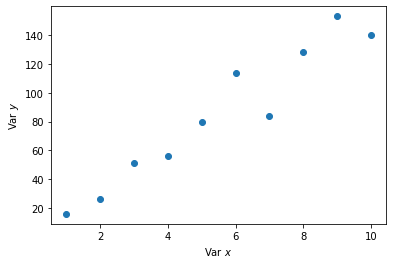

In [10]:
np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
y = np.random.randint(10, 20, size=10) * x # Vamos a generar 10 numeros aleatorios entre 10 y 20, luego lo multiplicamos con nuestra variable x


plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

La idea de la regresión lineal es poder modelar la dependencia de las variables independientes, con las variables dependientes. En este caso, nosotros explícitamente hemos generado esta dependencia de $y$ en función de $x$, pero en set de datos de la vida real, esta dependencia puede ser mucho más complicada de modelar. La forma de una regresión lineal simple corresponde a la siguiente ecuación: 

$\Large Y = \beta_1 X + \beta_0 + \epsilon$

donde $Y$ corresponde a nuestra variable dependiente, $X$ a nuestra variable independiente, $\beta_1$ al coeficiente de regresión el cual modela la relación de la variable $X$ con la variable $Y$, finalmente $\beta_0$ corresponde al intercepto y $\epsilon$ corresponde a un proceso aleatorio inherente a los datos. 

En este caso, nosotros podemos aproximar los valores de $Y$, y los parámetros del modelo ($\beta_1$ y $\beta_0$). Por lo mismo, utilizaremos la notación $\hat{Y}, \hat{\beta_1}, \hat{\beta_0}$ para referirnos a estas aproximaciones. Utilizando el **método de los mínimos cuadrados** podemos estimar los valores de los distintos parámetros:


- Primer paso, calcular $\Large \hat{\beta_1}$

$\Large \hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2} =\frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2}$

- Segundo paso, calcular $\Large \hat{\beta_0}$ en función de $\Large \hat{\beta_1}$

$\Large \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n} = \bar{y} - \hat{\beta_1}\bar{x}$

Vamos a utilizar la segunda parte de las fórmulas, utilizando una combinación de las funciones de suma y de obtener el promedio (`np.sum` y `np.mean`). En este caso vamos a transformar las sumatorias ($\Sigma$) en `np.sum`, los promedios ($\bar{x}$) en `np.mean`, y $n$ en `len(x)`. Cabe destacar que realizar las operaciones del tipo: $x - \bar{x}$, se pueden realizar debido a que $x$ es un vector de numpy, y este permite operaciones entre vectores y escalares.



In [11]:
x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(beta_1,beta_0)

15.2 1.2000000000000028


# Dinámica 1: 

Implementar la primera forma de cada uno de los parámetros:

$\Large \hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2}$ y $\Large \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n}$

- Compruebe que los valores de obtenidos con la primera forma y la segunda forma son iguales
- ¿Qué pasaría con nuestros coeficientes si cambiamos la forma de generar nuestra variable dependiente $Y$? Fije una semilla y reemplace el operador utilizado (en vez de multiplicar por $x$, cambiar por ej: suma)


In [12]:
beta1b = ((np.sum(x)*np.sum(y)) - (len(x)*np.sum(x*y))) / ((np.sum(x))**2 - len(x)*np.sum(x**2)) 
beta0b = (np.sum(y) - beta1b*np.sum(x)) / len(x) 
print(beta1b, beta0b) 


15.2 1.2


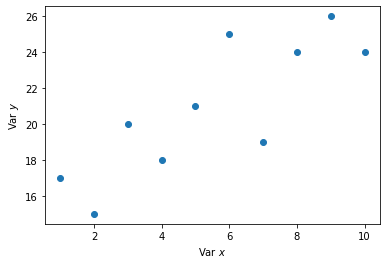

In [13]:
np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
y = np.random.randint(10, 20, size=10) + x # Vamos a generar 10 numeros aleatorios entre 10 y 20, luego lo multiplicamos con nuestra variable x


plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

In [14]:
beta1b = ((np.sum(x)*np.sum(y)) - (len(x)*np.sum(x*y))) / ((np.sum(x))**2 - len(x)*np.sum(x**2)) 
beta0b = (np.sum(y) - beta1b*np.sum(x)) / len(x) 
print(beta1b, beta0b) 


1.0121212121212122 15.333333333333332


# Fin Dinámica 1

Con los parámetros $\hat{\beta_1}$ y $\hat{\beta_0}$, podemos generar una función la cual reciba el valor el vector $x$, y realizar la estimación de $\hat{Y}$:

In [15]:
#LLamaremos a esta función, lin_reg(x), recibe el vector y utiliza las variables betas calculadas anteriormente
def lin_reg(x): # Una posible mejora, es que reciba los betas por parametros de la función
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal 
    return y_hat

Con esta función definida, podemos graficar nuestra recta obtenida utilizando la función `lin_reg`

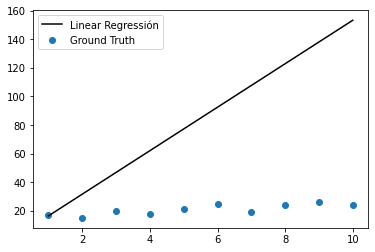

In [16]:
plt.scatter(x,y,label="Ground Truth") # Vamos a gráficar nuestros datos originales 
plt.plot(x,lin_reg(x), color="black", label="Linear Regressión") #Luego graficamos la curva ajustada 

plt.legend()
plt.show()

Podemos ver que nuestra regresión es bastante cercana a los valores reales utilizados para ajustar la regresión. Nosotros podemos calcular la bondad de ajuste de nuestra regresión, mediante el análisis de los errores. El error se define como: $y_i - \hat{y_i}$ y corresponde a la resta del valor real $i$-esimo, con el valor ajustado $i$-esimo.

Utilizando numpy, este cálculo es relativamente sencillo, para mostrar el paso a paso, vamos a tener los valores del vector $y$:


In [17]:
print(y)

[17 15 20 18 21 25 19 24 26 24]


Por otra parte, vamos a tener los valores del vector $\hat{y}$:

In [18]:
print(lin_reg(x))

[ 16.4  31.6  46.8  62.   77.2  92.4 107.6 122.8 138.  153.2]


Luego, los errores $e$, se obtienen simplemente con la resta entre estos dos elementos

In [19]:
e = y - lin_reg(x)
print(e)

[   0.6  -16.6  -26.8  -44.   -56.2  -67.4  -88.6  -98.8 -112.  -129.2]


Estos errores, podemos graficarlos utilizando el método de matplotlib `vlines` (Vertical Lines). Este método recibe como mínimo 3 parámetros: `x` (los valores en el eje X), `y_min` el inicio de la línea vertical, `y_max` el final de la línea vertical. En este caso, `y_min` va a corresponder a los valores reales $y$, e `y_max` corresponderán a los valores ajustados $\hat{y}$.

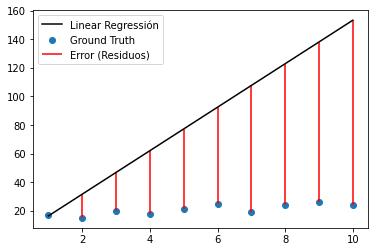

In [20]:
fig, ax = plt.subplots(1,1)
ax.plot(x,lin_reg(x), color="black", label="Linear Regressión") 
ax.scatter(x,y, label="Ground Truth")

ax.vlines(x, y, lin_reg(x), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto. 

plt.legend()
plt.show()

Como anteriormente lo dijimos, la regresión se ajusta bastante bien a los datos simulados. Por lo mismo, ahora vamos a cuantificar que bien se ajusta la regresión. Para esto, vamos a calcular el $R^2$, en función de la "Suma Total de los Cuadrados" ($SST$) y la "Suma de los Errores Cuadrados" ($SSE$). 

El $SST$ obtiene su nombre de su sigla en inglés *Sum of Squares Total*, y esta mide la variabilidad total dentro del set de datos (específicamente dentro de nuestra variable dependiente). Esta se calcula como:

$\Large SST = \sum_i (y_i - \bar{y})^2$

Por otra parte, el $SSE$ obtiene su nombre de su sigla en inglés *Sum of Squares Error*, y mide la diferencia total entre los valores reales (u observados) y los valores ajustados (o predichos). Esta se cacula como:

$\Large SSE = \sum_i (y_i - \hat{y})^2 = \sum_i e_i^2$

Con estas dos métricas podemos calcular el coeficiente de determinación $R^2$. Esto nos proporcionara una métrica que podemos utilizar para cuantificar cuanta variabilidad explican nuestro modelo de regresión. Esta se calcula de la siguiente forma utilizando las dos métricas mencionadas anteriormente.

$\Large R^2 = 1 - \frac{SSE}{SST}$

El $R^2$ puede resultar en valores entre $[0,1]$, donde si $R^2 = 1$, significa que la variable utilizada para la regresión lineal simple explica el 100% del comportamiento de la variable dependiente. Por el contrario, un $R^2 = 0$ significa que la variable independiente utilizada, no es capaz de explicar el comportamiento de la variable dependiente. 

Calculemos el $R^2$ para nuestros datos sintéticos:


In [21]:
SST = np.sum((y - np.mean(y))**2) #Calculamos la suma total de los cuadrados
SSE = np.sum((y - lin_reg(x))**2) # Calculamos la suma de los errores cuadrados
R2 = 1 - (SSE/SST) # Computamos el R^2

print("El R^2 obtenido para nuestros datos sinteticos es de {}".format(R2.round(4)))

El R^2 obtenido para nuestros datos sinteticos es de -459.2034


Con esto, podemos decir que nuestra regresión lineal simple, es capaz de explicar un $92.51\%$ de la variabilidad del comportamiento de nuestra variable dependiente sintética. Esto hace bastante sentido, ya que ese $7.49\%$ que no es capaz de explicar, principalmente se debe a la aleatoriedad que nosotros introdujimos en la variable dependiente (`np.random.randint(10, 20, size=10)`).

Otras métricas existentes para poder ver que tan buena es nuestra regresión, consisten en el análisis de los errores. Si nuestra regresión fuese perfecta, podríamos ver que el  $SSE = 0$, indicando claramente que nuestros valores predichos, son iguales a los valores observado. 

Estas métricas incluyen el Error Cuadrático Medio (Mean Squared error, $MSE$), El Error Absoluto Medio (Mean Absolute Error, $MAE$) y el Error Absoluto Porcentual Promedio (Mean Absolute Percentage Error, $MAPE$). Idealmente, si utilizamos nuestra regresión para poder hacer pronósticos, nosotros queremos que los errores que podamos cometer sean mínimos (de lo contrario, sería una mala predicción). Estas métricas nos permiten evaluar el error de nuestros modelos, y por consiguiente decir si nuestra regresión podría utilizarse para realizar pronósticos.

Interpretaciónes que se les pueden dar a estas métricas son bastante directas: el $MAE$ nos dirá una magnitud promedio de los residuos, dando una vista general de como podría comportarse nuestra regresión. El $MAPE$ nos indicara porcentualmente, que tanto se aleja nuestros valores predichos, de los valores reales. Finalmente, el $MSE$ cumple una misma función que el $MAE$, pero como estamos usando el cuadrado de los errores, esta métrica nos indicara que tan bueno es nuestro modelo, con respecto a valores atípicos (el error va a aumentar considerablemente para puntos alejados de nuestra regresión). Esto lo podrían visualizar en el gráfico de los errores visto anteriormente.

Las fórmulas para cada una de estas métricas son: 

$\Large MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y})^2$

$\Large MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}|$

$\Large MAPE = \frac{1}{n} \sum_{i=1}^n |\frac{y_i - \hat{y}}{y_i}|$

**Nota, MAPE se indefine para valores de $y_i = 0$, por lo mismo, no es una métrica comúnmente utilizada**


Utilizando `numpy` podemos computarlas:


In [22]:
mse = np.sum((y - lin_reg(x))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg(x))) / len(y)
mape = np.sum(np.abs((y - lin_reg(x))/y)) / len(y)

Luego, simplemente las imprimimos y vemos que si bien, el $MAE$ y el $MAPE$ son bajos, los puntos {6,7,9,10} de los datos, influyen considerablemente en el $MSE$

In [23]:
print(mse,mae,mape)

5747.94 64.02000000000001 2.8769445907377795


Alternativamente, podemos utilizar la librería de `scikit-learn` para poder utilizar sus implementaciones del $MSE$, $MAE$ y el $R^2$ (el $MAPE$ no está implementado en esta librería). Cada uno de estos métodos, recibe dos parámetros: los valores observados/reales `y_real` y los valores predichos/ajustados `y_pred`.

luego el uso de estas funciones son tan simples como por ejemplo: `mean_squared_error(y_real , y_pred)`


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #importamos las librerias

In [25]:
# calculamos cada una de estas metricas, y podemos ver que los valores son iguales a nuestras 
# implementaciones en numpy puro.
mean_squared_error(y , lin_reg(x)), mean_absolute_error(y , lin_reg(x)), r2_score(y , lin_reg(x))

(5747.94, 64.02000000000001, -459.20336269015206)

# Dinámica 2: Predicción del consumo de cerveza

Este set de datos fue recolectado en São Paulo - Brasil. Específicamente en un área universitaria con grupos de estudiantes entre 18 a 28 años de edad. Existen 7 variables en este set de datos:

- Data: la fecha en que se tomó la medición
- Temperatura Media (C): la temperatura promedio durante todo un día
- Temperatura Mínima (C): la temperatura mínima durante todo un día
- Temperatura Máxima (C): la temperatura máxima durante todo un día
- Precipitacao (mm): cantidad de mm de precipitaciones (lluvia):
- Final de Semana: Si era fin de semana (o no).
- **Consumo de cerveja (litros)**: La cantidad de cervezas consumidas en promedio de los grupos.

Esta última variable, corresponde a nuestra variable dependiente. La dinámica consiste en encontrar la variable independiente que explique mejor el Consumo de cerveza. Ante esto, deberán ajustar $5$ modelos de regresión lineal simple y obtener las métricas de bondad de ajuste y de errores para cada uno de estos modelos. Indique cual fue esta variable e imprima por pantalla cuales fueron los valores de $R^2$ y $MAE$,$MAPE$ y $MSE$. Finalmente, haga el grafico de la regresión lineal mostrando los errores obtenidos por la variable más explicativa.


In [26]:
cerveza_df = pd.read_csv("http://srodriguez.me/Datasets/Consumo_cerveja.csv")

cerveza_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [8]:
cerveza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [27]:
# Su codigo aca ...
def get_ln_param(x, y):
    x_min_mx = x - np.mean(x)  # x minus mean(x)
    y_min_my = y - np.mean(y)  # y minus mean(y)

    beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
    beta_0 = np.mean(y) - (beta_1 * np.mean(x))

    return (beta_0, beta_1)

def lin_reg_b(x, beta_0, beta_1):  # Una posible mejora, es que reciba los betas por parametros de la función
    y_hat = (beta_1 * x) + beta_0  # Aplicamos la forma de la regresión lineal 
    return y_hat

def ln_measures(x, y, beta_0, beta_1):
    SST = np.sum((y - np.mean(y))**2) #Calculamos la suma total de los cuadrados
    SSE = np.sum((y - lin_reg_b(x, beta_0, beta_1))**2) # Calculamos la suma de los errores cuadrados
    R2 = 1 - (SSE/SST) # Computamos el R^2
    mse = np.sum((y - lin_reg_b(x, beta_0, beta_1))**2) / len(y)
    mae = np.sum(np.abs(y - lin_reg_b(x, beta_0, beta_1))) / len(y)
    mape = np.sum(np.abs((y - lin_reg_b(x, beta_0, beta_1))/y)) / len(y)
    
    return (R2, mse, mae, mape)

# Se selecciona el Y
y = cerveza_df['Consumo de cerveja (litros)']

# Se seleccionan los x

x = cerveza_df['Temperatura Media (C)']
betas = get_ln_param(x, y)       
err = ln_measures(x, y, betas[0], betas[1])

print(f"Para x : {x.name}, y : Temperatura Media (C)")
print(f"R2 = {err[0]}, mse = {err[1]}, mae = {err[2]}, mape = {err[3]} \n")

x = cerveza_df['Temperatura Minima (C)']
betas = get_ln_param(x, y)       
err = ln_measures(x, y, betas[0], betas[1])

print(f"Para x : {x.name}, y : Temperatura Media (C)")
print(f"R2 = {err[0]}, mse = {err[1]}, mae = {err[2]}, mape = {err[3]} \n")

x = cerveza_df['Temperatura Maxima (C)']
betas = get_ln_param(x, y)       
err = ln_measures(x, y, betas[0], betas[1])

print(f"Para x : {x.name}, y : Temperatura Media (C)")
print(f"R2 = {err[0]}, mse = {err[1]}, mae = {err[2]}, mape = {err[3]} \n")

x = cerveza_df['Precipitacao (mm)']
betas = get_ln_param(x, y)       
err = ln_measures(x, y, betas[0], betas[1])

print(f"Para x : {x.name}, y : Temperatura Media (C)")
print(f"R2 = {err[0]}, mse = {err[1]}, mae = {err[2]}, mape = {err[3]} \n")

x = cerveza_df['Final de Semana']
betas = get_ln_param(x, y)       
err = ln_measures(x, y, betas[0], betas[1])

print(f"Para x : {x.name}, y : Temperatura Media (C)")
print(f"R2 = {err[0]}, mse = {err[1]}, mae = {err[2]}, mape = {err[3]} \n")

Para x : Temperatura Media (C), y : Temperatura Media (C)
R2 = 0.3301820493324322, mse = 12.92710873443203, mae = 2.9552853855692707, mape = 0.11866143015777049 

Para x : Temperatura Minima (C), y : Temperatura Media (C)
R2 = 0.1540631083123537, mse = 16.32610498183107, mae = 3.3102579821783378, mape = 0.1340557309159251 

Para x : Temperatura Maxima (C), y : Temperatura Media (C)
R2 = 0.413027909953363, mse = 11.328230341613486, mae = 2.7642672738837044, mape = 0.11041857942609001 

Para x : Precipitacao (mm), y : Temperatura Media (C)
R2 = 0.037552356536804665, mse = 18.574696790145335, mae = 3.5547627599855987, mape = 0.14489671916675764 

Para x : Final de Semana, y : Temperatura Media (C)
R2 = 0.2560162860930929, mse = 14.358466142533073, mae = 3.0706100632244473, mape = 0.12543897884140676 



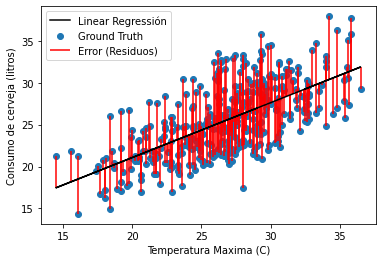

In [28]:
fig, ax = plt.subplots(1,1)

y = cerveza_df['Consumo de cerveja (litros)']
x = cerveza_df['Temperatura Maxima (C)']
betas = get_ln_param(x, y)  

ax.plot(x,lin_reg_b(x, betas[0], betas[1]), color="black", label="Linear Regressión") 
ax.scatter(x,y, label="Ground Truth")

ax.vlines(x, y, lin_reg_b(x, betas[0], betas[1]), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto. 

ax.set_xlabel('Temperatura Maxima (C)')
ax.set_ylabel('Consumo de cerveja (litros)')

plt.legend()


# Fin dinámica 2

# Regresión lineal con múltiples variables independientes

Utilizando el mismo dataset obtenido de la dinámica 2, vamos a ajustar una regresión lineal múltiple. Esto quiere decir, que, en vez de ajustar un solo parámetro en nuestra regresión para tratar de explicar la variable dependiente, utilizaremos dos o más variables dependientes. En este caso, nuestra regresión tomara una nueva forma:


$\Large Y =  \beta_0 +X_1\beta_1+X_2\beta_2+\dots+X_m\beta_m$

En este caso vamos a tener $m+1$ parámetros, donde $m$ corresponde a la cantidad de variables dependientes que utilizaremos. La razón de que sean $m+1$ variables, es porque tenemos que considerar el intercepto $\hat{\beta_0}$.

La ecuación anterior, podemos representarlas en forma matricial:

$\large Y = X^T\beta$ donde:

$\large Y = \begin{bmatrix}Y_1 \\ Y_2  \\ \vdots \\ Y_m\end{bmatrix}$ $\large \beta = \begin{bmatrix}\beta_1 \\ \beta_2  \\ \vdots \\ \beta_m\end{bmatrix}$ $\large X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}$

Sin entrar fuerte en la matemática, el encontrar la matriz de los parámetros estimados $\large \hat{\beta}$ para generar nuestra predicción $\large \hat{Y}$ se lleva a cabo minimizando la suma de los errores para cada una de las variables presentes en nuestro set de datos. Esto nos genera una solución fácilmente programable en numpy, de la forma:

$\large \hat{\beta} = (X^TX)^{-1}X^TY $

Para poder incorporar el intercepto ($\beta_0$), tenemos que hacer una pequeña modificación a la matriz $X$, y esta corresponde a agregar una columna de largo $n$, con la constante $1$. Esto se hace para poder modelar el intercepto en la última ecuación presentada:

$\large X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix} \rightarrow X' = \begin{bmatrix} 1& X_{11} & X_{12} & \cdots & X_{1m}\\ 1 & X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \vdots & \ddots & \vdots\\ 1 &X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}$


In [29]:
cerveza_df = pd.read_csv("http://srodriguez.me/Datasets/Consumo_cerveja.csv") # Cargamos los datos
cerveza_df.head() # Mostramos los primeros 5

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [31]:
#Extraemos nuestras primeras 5 variables independientes
X1 = cerveza_df['Temperatura Media (C)']
X2 = cerveza_df['Temperatura Minima (C)']
X3 = cerveza_df['Temperatura Maxima (C)']
X4 = cerveza_df['Precipitacao (mm)']
X5 = cerveza_df['Final de Semana']

# Extraemos la variable dependiente
y = cerveza_df['Consumo de cerveja (litros)']


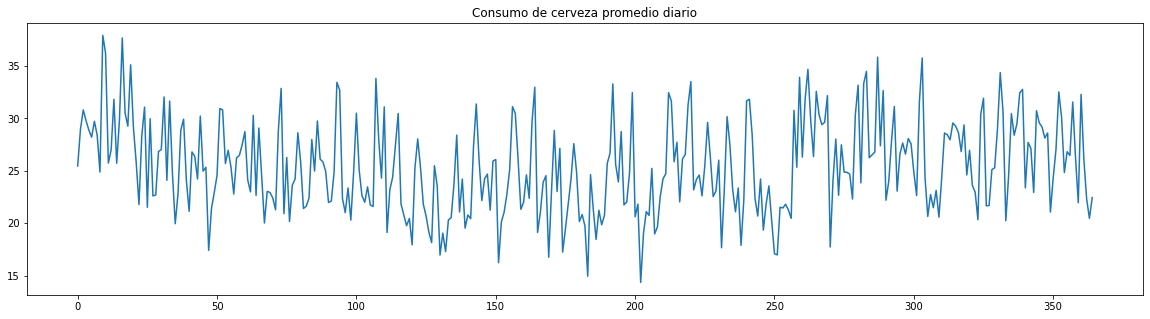

In [32]:
# Vamos a graficar nuestra variable y a traves del tiempo: 

plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)),y)
plt.title("Consumo de cerveza promedio diario")
plt.show()

Acá generaremos una grilla de matplotlib, principalmente, nos permitirá generar subgráficos que ocupen más de una fila/columna.

[Documentación Gridspec](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html)

En este caso, vamos a hacer varios diagramas de dispersión, para ver la relación existente entre nuestras variables independientes, con la variable dependiente.


Text(0.5, 1.0, '$x_5$ Final de Semana')

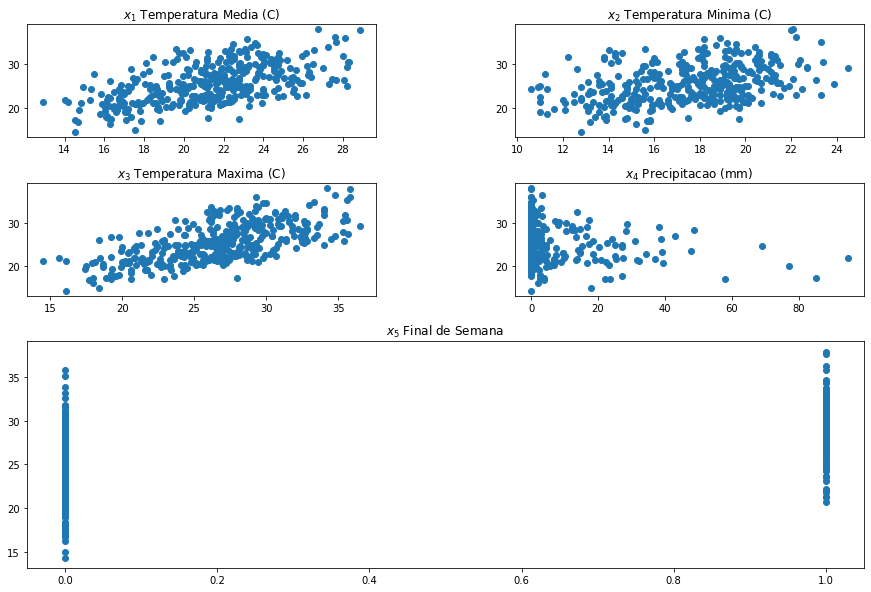

In [37]:
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3, height_ratios=[1, 1, 2])

plt.figure(figsize=(15,10))
ax = plt.subplot(grid[0,0]) #Ocupar la primera fila, primera columna
ax.scatter(X1,y)
ax.set_title("$x_1$ Temperatura Media (C)")

ax = plt.subplot(grid[0,1])#Ocupar la primera fila, segunda columna
ax.scatter(X2,y)
ax.set_title("$x_2$ Temperatura Minima (C)")

ax = plt.subplot(grid[1,0]) #Ocupar la segunda fila, primera columna
ax.scatter(X3,y)
ax.set_title("$x_3$ Temperatura Maxima (C)")

ax = plt.subplot(grid[1,1])#Ocupar la segunda fila, segunda columna
ax.scatter(X4,y)
ax.set_title("$x_4$ Precipitacao (mm)")

ax = plt.subplot(grid[2,:])#Ocupar la tercera fila y ambas columnas
ax.scatter(X5,y)
ax.set_title("$x_5$ Final de Semana")

Podemos ver que el consumo de cerveza al parecer tiene una correlación positiva con las temperaturas. Generemos nuestra matriz X previo al proceso de obtención de los betas:

In [34]:
X = np.zeros((len(X1),6)) #Generamos una matriz de Nx6, uno para cada una de nuestros variables independientes, e incluyendo la columna para el intercepto: 
X.shape

(365, 6)

In [35]:
# Llenamos la matriz, con cada una de los valores correspondientes, en este caso, el intercepto ira en la primera columna
# y para el resto de las columnas las extraeremos utilizando los valores de una serie de pandas (.value)
X[:,0] = 1
X[:,1] = X1.values
X[:,2] = X2.values
X[:,3] = X3.values
X[:,4] = X4.values
X[:,5] = X5.values


In [36]:
X[:5] #Ãhora imprimimos las primeras 5 filas

array([[ 1.  , 27.3 , 23.9 , 32.5 ,  0.  ,  0.  ],
       [ 1.  , 27.02, 24.5 , 33.5 ,  0.  ,  0.  ],
       [ 1.  , 24.82, 22.4 , 29.9 ,  0.  ,  1.  ],
       [ 1.  , 23.98, 21.5 , 28.6 ,  1.2 ,  1.  ],
       [ 1.  , 23.82, 21.  , 28.3 ,  0.  ,  0.  ]])

Para transponer una matriz de numpy, es tan sencillo como llamar a `matriz.T` para realizar esta operación. En el caso de la multiplicación matricial, necesitamos utilizar el método `np.dot` (Recordar que existen la restricción de que el número de columnas de la primera matriz, tiene que ser igual al número de filas de la segunda matriz). Finalmente, para invertir una matriz, tenemos que utilizar el método `np.lingal.inv` y aplicarlo en una matriz.

In [38]:
XTX = np.dot(X.T,X) # Calculamos X traspuesto multiplicado por X
XTY = np.dot(X.T,y) # Calculamos X traspuesto por Y
betas = np.dot(np.linalg.inv(XTX),XTY) #Calculamos XTX^-1 por XTY, el resultado va a ser nuestro vector de betas de largo m + 1

# Extraemos los betas
beta_0 = betas[0]
beta_1 = betas[1]
beta_2 = betas[2]
beta_3 = betas[3]
beta_4 = betas[4]
beta_5 = betas[5]

betas #Imprimimos los valores de nuestros parametros ajustados

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

In [39]:
#Finalmente, definimos nuestra función  para la regresión lineal, que reciba por parametros los arreglos para cada variable
# y que internamente, calcule la variable Y con los nuevos betas

def lin_reg2(x1,x2,x3,x4,x5):
    y_hat = (beta_1 * x1) + (beta_2 * x2) + (beta_3 * x3) + (beta_4 * x4) + (beta_5 * x5) + beta_0
    return y_hat

Graficamos la señal original, en comparación con lo que obtenemos de nuestra regresión lineal múltiple

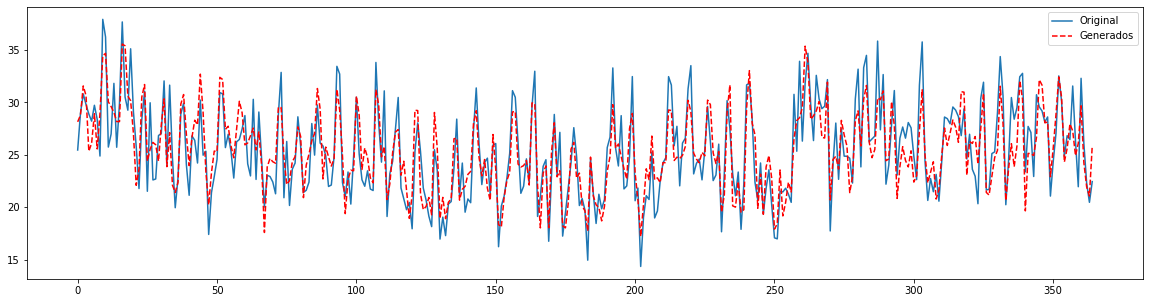

In [40]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)),y,label="Original")
plt.plot(np.arange(len(y)),lin_reg2(X1,X2,X3,X4,X5),'--',color="red", label="Generados")

plt.legend()

plt.show()

Y a su vez, podemos calcular nuestras métricas de bondad de ajuste, y errores asociados:

In [41]:
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2)

R2 = 1 - (SSE/SST) 
print(R2)

0.7226497614758338


In [42]:
mse = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg2(X1,X2,X3,X4,X5))) / len(y)
mape = np.sum(np.abs((y - lin_reg2(X1,X2,X3,X4,X5))/y)) / len(y)

In [43]:
print(mse,mae,mape)

5.3527032044292975 1.9639823831681926 0.07820950596297474


de lo obtenido, podemos ver que utilizando una regresión lineal múltiple, nuestro $R^2$ aumenta, y los errores disminuyen al compararse con el mejor de las regresiones simples realizadas en la dinámica 2.

Para ir finalizando, existen múltiples librerías que ya tienen implementado las regresiones lineales, vamos a ver la implementación existente en `scikit-learn`

[Documentación LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


In [44]:
from sklearn.linear_model import LinearRegression #En este caso, de scikit-learn, de los modelos lineales, importamos la regresión lineal
lr = LinearRegression() # Y generamos un obtejo de LinearRegressión

In [45]:
X = cerveza_df.iloc[:,1:6] #Obtenemos nuestra matriz X
X.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,27.30,23.9,32.5,0.0,0
1,27.02,24.5,33.5,0.0,0
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,0


Una de las ventajas de scikit-learn, es que para la regresión lineal automáticamente añaden el intercepto a calcular, sin que nosotros tengamos que modificar nuestra matriz $X$. Para poder ajustar nuestro modelo, necesitamos utilizar el método `lr.fit(X,y)`:

In [46]:
lr.fit(X,y.values)

LinearRegression()

Con esto, ya tenemos ajustado el modelo de regresión lineal, y solo queda extraer los betas. para esto, tenemos que acceder a los parámetros `lr.intercept` (para $\hat{\beta_0}$) y `lr.coef_` para el resto de los betas

In [47]:
lr.intercept_, lr.coef_

(6.44469636057201,
 array([ 0.03079559, -0.01903491,  0.65600076, -0.05746938,  5.18318073]))

Haciendo la comparación con nuestros betas, vemos que son iguales.

In [48]:
betas

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

# Dinámica 3

Regresión lineal múltiple, para predecir el precio de una casa. En este caso, trabajaremos con un set de datos de precios de casas del condado de King, Georgia, USA. El set de datos contiene 21 variables, pero no todas van a servir para el proceso de la regresión. Su tarea va a ser seleccionar las variables que va a descartar, y trabajar con el resto de las variables restantes para generar una regresión lineal múltiple utilizando numpy para obtener los $\hat{\beta}$. Además de esto, calcule el $R^2$ y obtenga las métricas de error $MSE$, $MAE$ y $MAPE$. 

**Desafío:** Puede que el uso de todas las variables, no genere el mejor modelo. Por lo mismo, el **desafío** consiste en implementar el algoritmo de "Step Forward Feature Selection". La idea de este algoritmo es agregar de a 1 en 1 las variables existentes en nuestro set de datos y ver como mejora el proceso de ajuste de la regresión lineal.

1.- De las posibles variables consideradas en un principio (la cual llamaremos $m$), entrene $m$ modelos de regresión lineal (uno por cada variable), y seleccione la variable que obtenga un mejor $MAE$. 

2.- Con la variable seleccionada, remuévala del conjunto de posibles variables y guárdela en una lista de variables seleccionadas (`selected_vars`)

3.- Del conjunto de posibles variables restantes, entrene $m-len(selected\_vars)$ modelos de regresión lineal utilizando las variables restantes en conjunto con `selected_vars`. Seleccione la nueva variable que obtenga un mejor $MAE$. Repita el paso 2. hasta que no quede ninguna variable.

Finalmente, con el procedimiento realizado, y ninguna variable restante en el conjunto de posible variable, imprima por pantalla el mejor conjunto de variables junto con su $MAE$. Adicionalmente, puede graficar la curva de cómo va evolucionando el $MAE$ a medida que va agregando variables.

**Nota:** Para el desafío, es recomendable utilizar `LinearRegression` de `scikit-learn` por temas de facilidad de implementación del algoritmo de "Step Forward Feature Selection". Para poder obtener el $\hat{Y}$ utilizando `LinearRegression`, se debe utilizar el método `.predict(X)` posteriormente a haber ajustado el modelo (`.fit(X,y)`), y este computara: 

$$\Large \hat{Y} =  \hat{\beta_0} +X_1\hat{\beta_1}+X_2\hat{\beta_2}+\dots+X_m\hat{\beta_m}$$ 

Ejemplo de uso:

```python
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)
```

In [8]:
housing_df = pd.read_csv("http://srodriguez.me/Datasets/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [48]:
housing = housing_df.drop(['id','date','zipcode','lat','long'], axis = 1)
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [95]:
variables = list(housing.columns[1:])

In [96]:
variables 

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

In [97]:
housing.head()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

mae_dict = {}

best_vars = list()
best_mae = list()
for i in variables:

    y = housing['price']
    X = housing.loc[:,i].values.reshape(-1,1) 

    lr = LinearRegression()
    lr.fit(X,y.values)

    y_pred = lr.predict(X)

    mae_dict[i] = mean_absolute_error(y, y_pred) # <---
    
best_mae.append({min(mae_dict):mae_dict[min(mae_dict)]})
best_vars.append(min(mae_dict))

variables.remove(min(mae_dict))

In [98]:
mae_dict

{'bedrooms': 220663.01493307095,
 'bathrooms': 203653.35775874788,
 'sqft_living': 173688.2733595311,
 'sqft_lot': 232645.57564700113,
 'floors': 223961.68350907665,
 'waterfront': 229555.66333324494,
 'view': 218587.7506378326,
 'condition': 233554.61061880903,
 'grade': 175179.0251031181,
 'sqft_above': 191857.48707372468,
 'sqft_basement': 224476.4838737479,
 'yr_built': 234021.44811028388,
 'yr_renovated': 232163.0294797616,
 'sqft_living15': 186637.0740947006,
 'sqft_lot15': 232996.448291433}

In [99]:
best_vars

['bathrooms']

In [100]:
variables

['bedrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

In [101]:
best_mae

[{'bathrooms': 203653.35775874788}]

In [102]:
mae_dict = {}

while mae_anterior < mae_sgte:

    for i in variables:

        y = housing['price']
        X = housing[best_vars + [i]].values

        lr = LinearRegression()
        lr.fit(X,y.values)

        y_pred = lr.predict(X)

        mae_dict[i] = mean_absolute_error(y, y_pred) # <---

    best_mae.append({min(mae_dict):mae_dict[min(mae_dict)]})
    best_vars.append(min(mae_dict))
    variables.remove(min(mae_dict))

In [103]:
best_mae # WENAA

[{'bathrooms': 203653.35775874788}, {'bedrooms': 203167.53700400735}]

In [113]:
best_mae[-1].values()[0]

TypeError: 'dict_values' object is not subscriptable

In [111]:
best_mae[-2].values()[0]

dict_values([203653.35775874788])

In [112]:
best_mae[-2].values() - best_mae[-1].values()

TypeError: unsupported operand type(s) for -: 'dict_values' and 'dict_values'

In [104]:
best_vars

['bathrooms', 'bedrooms']

In [105]:
variables

['sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

# Fin Dinámica 3